In [59]:
import MisrToolkit as Mtk
from MisrToolkit import *
import os
import pandas as pd
import numpy as np
from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL


In [60]:
def find_unique_pob(atmmodel_file_fp, list_of_columns):
    
    print('input file found: %s' %(os.path.isfile(atmmodel_file_fp)))
    in_csv_df = pd.read_csv(atmmodel_file_fp)
    print(in_csv_df.columns)
    pob_unique = in_csv_df.drop_duplicates(subset=list_of_columns, keep='first', ignore_index=False)
    pob_unique.info()
    
    return pob_unique

## set up hdf file directory

In [62]:
# hdf_dir = "/Volumes/SEAGATE/april_2016/hdf_from_PH/move_to_Mac"
# hdf_dir = "/Volumes/SEAGATE/april_2016/hdf_from_PH/move_to_Mac"
# hdf_dir = "/Volumes/Ehsan-7757225325/2016/july_2016/ellipsoid_files/elliposid_files_used_for_mapping"
hdf_dir = "/Volumes/Ehsan-7757225325/2016/april_2016/10752_april_2016_1_16_susan"


# hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P"+path_num+"_O0"+str(orbit_num)+"_"+cam+"_F03_0024.b003-046.f49e0896e.hdf"
hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P"+path_num+"_O0"+str(orbit_num)+"_"+cam+"_F03_0024.hdf"



In [72]:
path_num = '157'
orbit_num = 88131
start_block = 10
end_block = 10
corners_for_block = 23
cam = "AN"


In [79]:
hdf_file_label = "MISR_AM1_GRP_ELLIPSOID_GM_P233_O086796_CF_F03_0024.hdf"
hdf_file_fp = os.path.join(hdf_dir, hdf_file_label)

os.path.isfile(hdf_file_fp)

True

## bash- rename/mv hdf file names in bash

In [94]:
! echo $hdf_file_fp  

/Volumes/Ehsan-7757225325/2016/april_2016/10752_april_2016_1_16_susan/MISR_AM1_GRP_ELLIPSOID_GM_P233_O086796_CF_F03_0024.hdf


In [74]:
hdf_file_fp = os.path.join(hdf_dir,hdf_file)
print(os.path.isfile(hdf_file_fp))
print(hdf_file_fp)

False
/Volumes/Ehsan-7757225325/2016/april_2016/10752_april_2016_1_16_susan/MISR_AM1_GRP_ELLIPSOID_GM_P96_O087035_AN_F03_0024.hdf


In [6]:
input_hdf = MtkFile(hdf_file_fp)

In [7]:
input_hdf.block

(1, 140)

In [8]:
input_hdf.grid

<function MtkFile.grid>

In [9]:
input_hdf.grid_list

['BlueBand',
 'GreenBand',
 'RedBand',
 'NIRBand',
 'BRF Conversion Factors',
 'GeometricParameters']

In [10]:
input_hdf.grid("RedBand").field_list

['Red Radiance/RDQI',
 'Red Radiance',
 'Red RDQI',
 'Red DN',
 'Red Equivalent Reflectance',
 'Red Brf']

In [11]:
input_hdf.grid("RedBand").native_field_list

['Red Radiance/RDQI']

In [12]:
r = MtkRegion(int(path_num), start_block, end_block)
type(r)

MisrToolkit.MtkRegion

In [13]:
# find block corners

corners = path_block_range_to_block_corners(int(path_num), start_block, end_block)

In [14]:
# type(corners.block[1].ctr)
# dir(corners.block[9])

In [15]:
print(corners.block[corners_for_block].ulc)
print(corners.block[corners_for_block].urc)
print(corners.block[corners_for_block].llc)
print(corners.block[corners_for_block].lrc)

(0.000000,0.000000)
(0.000000,0.000000)
(0.000000,0.000000)
(0.000000,0.000000)


In [16]:
# print(bls_to_latlon(int(path_num), 275, 9, 0, 0))
# print(bls_to_latlon(int(path_num), 275, 9, 0, 2047))
# print(bls_to_latlon(int(path_num), 275, 9, 511, 0)) # llc
# print(bls_to_latlon(int(path_num), 275, 9, 511, 2047))

In [17]:
input_hdf.grid("RedBand").field("Red Radiance/RDQI").fill_value

65515

## note: 65515 is fill value for padding part of the image = white part?

In [18]:
redband_img = input_hdf.grid("RedBand").field("Red Radiance/RDQI").read(r).data()

In [19]:
print("redBand min: %d" %redband_img.min())
print("redBand med: %d" %np.median(redband_img))
print("redBand max: %d" %redband_img.max())

redBand min: 988
redBand med: 5284
redBand max: 65515


In [20]:
redband_img.shape

(512, 2048)

In [21]:
print(redband_img.dtype)
print(type(redband_img))

uint16
<class 'numpy.ndarray'>


In [22]:
redband_img_flat = redband_img.flatten()
redband_img_flat.shape

(1048576,)

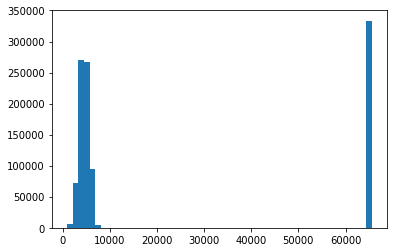

In [23]:
# np.histogram(redband_img)
ret_hist = plt.hist(redband_img_flat, bins='auto')
plt.show()

In [24]:
# def rescale(in_arr):
#     domain = in_arr.max()-in_arr.min()
#     for i in 

In [75]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
    img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0

<Figure size 432x288 with 0 Axes>

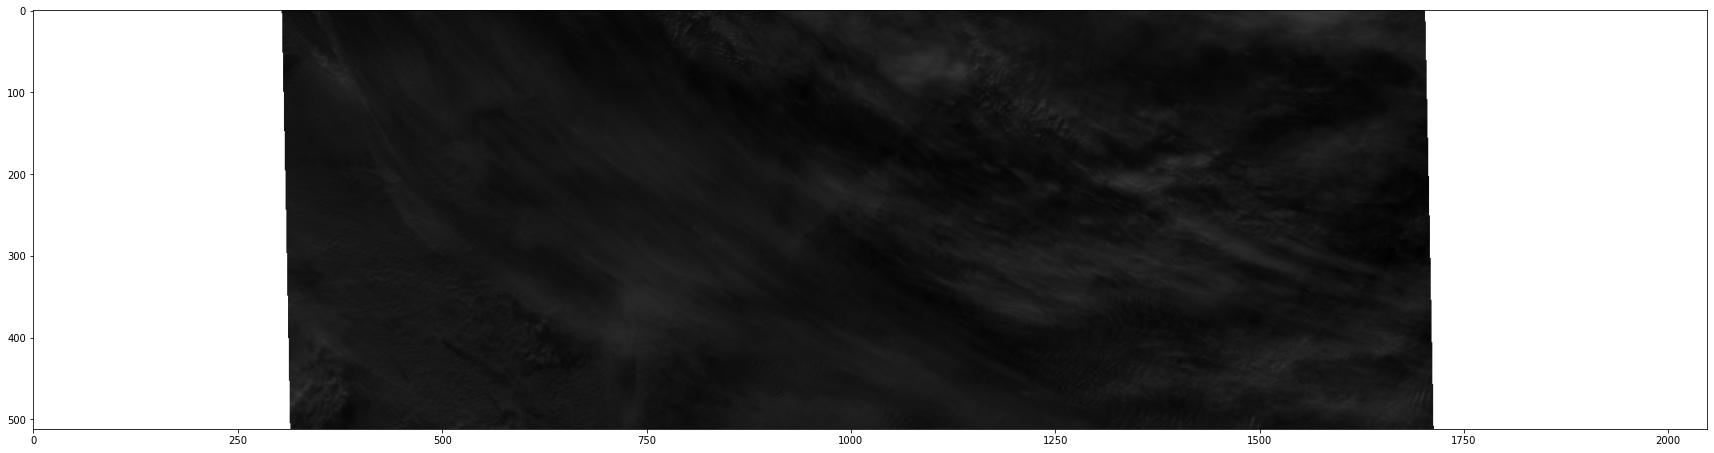

0

In [76]:
plot_here_and_write(redband_img, hdf_dir)


In [65]:
# atmmodel_csv = 'atmmodel_july_2016_1to16.csv'
# home_dir = '/Users/ehsanmos/MLP_dataset/july_2016'


atmmodel_csv = 'atmmodel_april_2016.csv'
home_dir = '/Users/ehsanmos/MLP_dataset/april_2016'

in_csv = os.path.join(home_dir, atmmodel_csv)

In [69]:
list_of_cols = ['#path',' orbit', ' img_block']
pob_unique = find_unique_pob(in_csv, list_of_cols)


input file found: True
Index(['#path', ' orbit', ' img_block', ' line', ' sample', ' lat', ' lon',
       ' an', ' ca', ' cf', ' rms', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 119914
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #path       140 non-null    int64  
 1    orbit      140 non-null    int64  
 2    img_block  140 non-null    int64  
 3    line       140 non-null    int64  
 4    sample     140 non-null    int64  
 5    lat        140 non-null    float64
 6    lon        140 non-null    float64
 7    an         140 non-null    float64
 8    ca         140 non-null    float64
 9    cf         140 non-null    float64
 10   rms        140 non-null    float64
 11   weight     140 non-null    float64
 12   npts       140 non-null    float64
 13   cloud      140 non-null    int64  
 14   var        140 non-null    float64

In [78]:
# check/visualize unique images in a loop

for row_indx in range(pob_unique.shape[0]):
    
    path_num = str(pob_unique['#path'].iloc[row_indx])
    orbit_num = str(pob_unique[' orbit'].iloc[row_indx])
    start_block = str(pob_unique[' img_block'].iloc[row_indx])
    end_block = start_block
    cam = "AN"
    
    hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P"+path_num+"_O0"+str(orbit_num)+"_"+cam+"_F03_0024.hdf"
    hdf_file_fp = os.path.join(hdf_dir,hdf_file)
    hdf_file_stat = os.path.isfile(hdf_file_fp)
#     print(hdf_file_stat)
    if (hdf_file_stat==False):
        print('hdf file not found!')
        continue
    # open (allocate pointer) and read hdf file 
    input_hdf = MtkFile(hdf_file_fp)
    input_hdf.block
    r = MtkRegion(int(path_num), int(start_block), int(end_block))
    type(r)
    redband_img = input_hdf.grid("RedBand").field("Red Radiance/RDQI").read(r).data()
    print('path: %s orbit: %s block: %s' %(path_num, orbit_num, start_block))
    plot_here_and_write(redband_img, hdf_dir)
    # need to close the hdf-file here?


print('successfully printed %s files!' %pob_unique.shape[0])


hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
hdf file not found!
